In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.datasets import fetch_datasets

from imblearn.pipeline import make_pipeline

from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks

In [2]:
def make_data(sep):

    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,
                           random_state=1)

    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)

    return X, y

In [3]:
# Load kdd
data = fetch_datasets()['protein_homo']

data = pd.concat([
    pd.DataFrame(data.data),
    pd.Series(data.target)
], axis=1)

col_names = [str(i) for i in range(74)] +['target']
data.columns = col_names

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


0    983
1     17
Name: count, dtype: int64


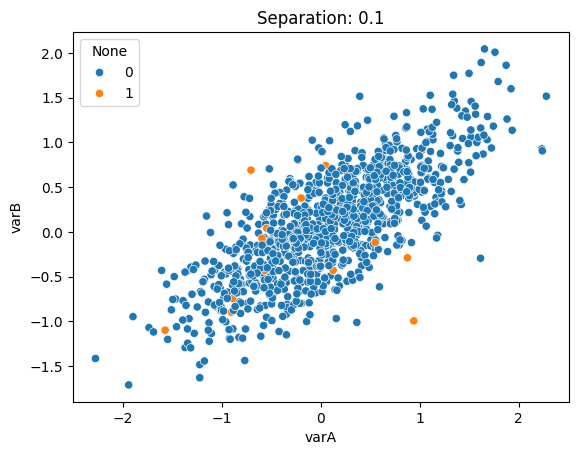

0    983
1     17
Name: count, dtype: int64


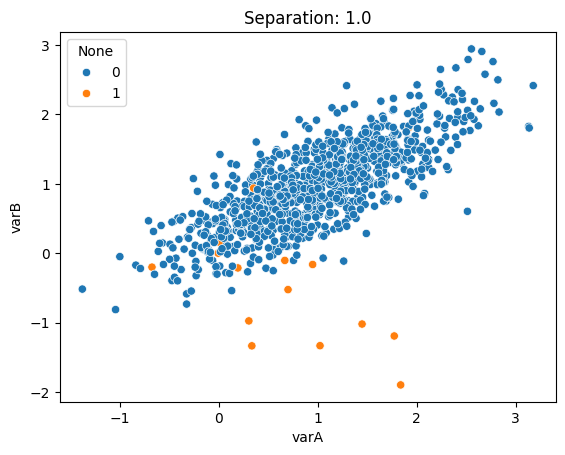

0    983
1     17
Name: count, dtype: int64


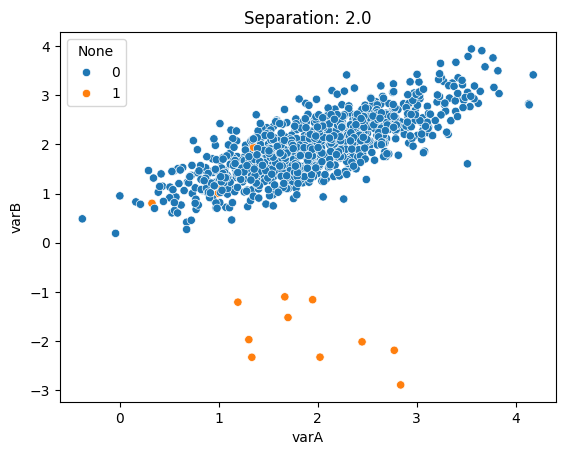

In [4]:
for sep in [0.1, 1., 2.]:
  X,y = make_data(sep)
  print(y.value_counts())

  sns.scatterplot(
      data=X, x="varA", y="varB", hue=y,
  )

  plt.title(f'Separation: {sep}')
  plt.show()

## RandomUnserSampling

In [ ]:
X,y = make_data(sep=2)

rus = RandomUnderSampler(
    sampling_strategy='auto',
    random_state=0,
    replacement=True,
)

X_resampled, y_resampled = rus.fit_resample(X, y)


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_resampled.shape, y_resampled.shape

((34, 2), (34,))

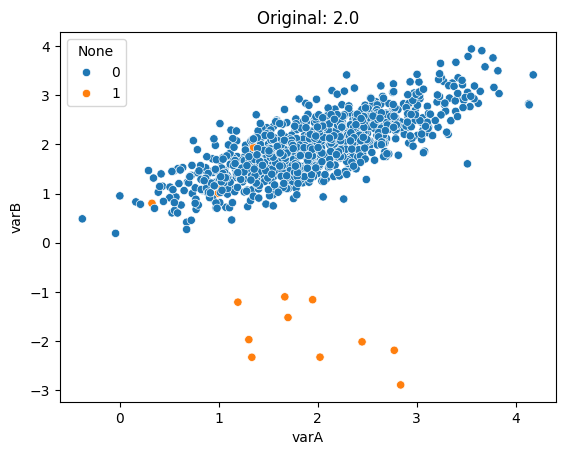

In [ ]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y,
)

plt.title(f'Original: {sep}')
plt.show()

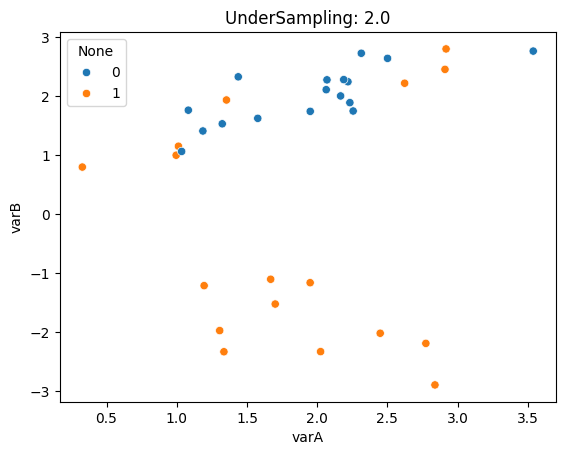

In [ ]:
sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y,
)

plt.title(f'UnderSampling: {sep}')
plt.show()

# Kdd dataset

In [ ]:
data.target.value_counts() / len(data)

,count
target,
-1,0.991108
1,0.008892


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [ ]:
rus = RandomUnderSampler(
    sampling_strategy='auto',
    random_state=0,
    replacement=True,
)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape, y_resampled.shape

((1860, 74), (1860,))

<Axes: xlabel='0', ylabel='1'>

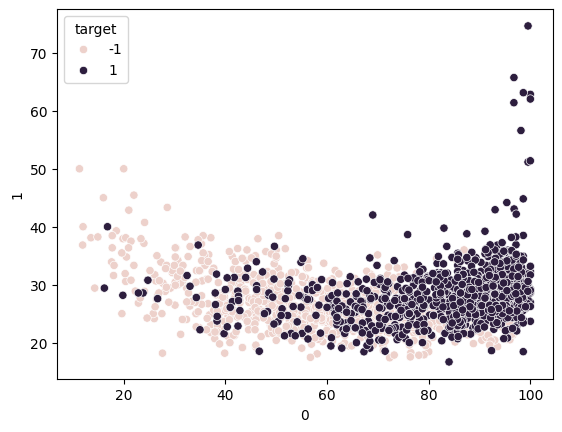

In [ ]:
col_names = [str(i) for i in range(74)] +['target']

data_resampled = pd.concat([X_resampled, y_resampled], axis=1)
data_resampled.columns = col_names

sns.scatterplot(data=data_resampled, x="0", y="1", hue="target")

In [ ]:
# function to train random forests and evaluate the performance
from sklearn.metrics import confusion_matrix

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

    cm = confusion_matrix(y_test, rf.predict(X_test), labels=[-1, 1])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['-1', '1'], yticklabels=['-1', '1'])

Train set
Random Forests roc-auc: 0.9752633767769803
Test set
Random Forests roc-auc: 0.963185580626298


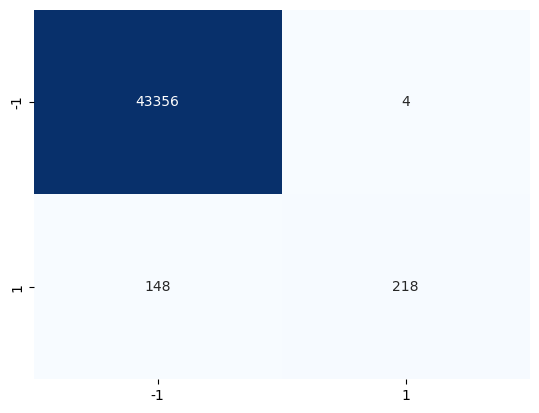

In [ ]:
run_randomForests(X_train, X_test, y_train,y_test)

Train set
Random Forests roc-auc: 0.9938062203722973
Test set
Random Forests roc-auc: 0.9810792979856028


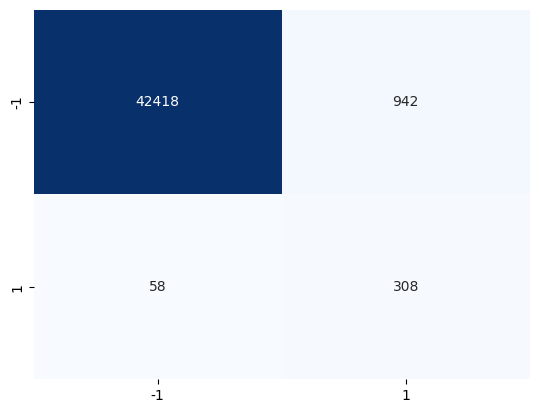

In [ ]:
run_randomForests(X_resampled, X_test, y_resampled, y_test)

# Condensed Nearest Neighbours

-  境界線近くのデータをSamplingする
- kNNが絡むのでパフォーマンス向上もむずくかしく結構きびしい印象。。。
- 大量のkNNも実行されるので時間がめちゃくちゃかかる

In [ ]:
X, y = make_data(sep=2)


cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',
    random_state=0,
    n_neighbors=1,
    n_jobs=4)

X_resampled, y_resampled = cnn.fit_resample(X, y)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_resampled.shape, X_resampled.shape

((70, 2), (70, 2))

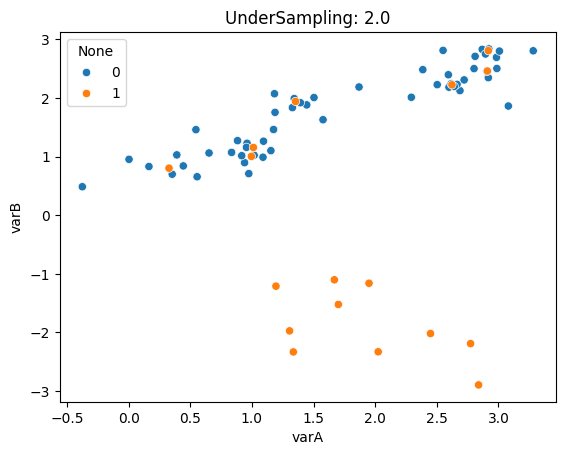

In [ ]:
sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled,
)

plt.title(f'UnderSampling: {sep}')
plt.show()

In [ ]:
#kdd
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [ ]:
# Warning!! this process is very heavy!!!!!
cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',  # sundersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,
    n_jobs=4)

X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)


# Setting up a classifier with under-sampling and CV

In [17]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(dataset)
    print(Counter(data.target))
    print()

car_eval_34
Counter({-1: 1594, 1: 134})

ecoli
Counter({-1: 301, 1: 35})

thyroid_sick
Counter({-1: 3541, 1: 231})

arrhythmia
Counter({-1: 427, 1: 25})

ozone_level
Counter({-1: 2463, 1: 73})



In [18]:
def run_model(X_train, y_train, undersampler=None):

    rf = RandomForestClassifier(
            n_estimators=100, random_state=39, max_depth=3, n_jobs=4
        )

    scaler = MinMaxScaler()

    if not undersampler:
        model = rf

    else:
        model = make_pipeline(
            scaler,
            undersampler,
            rf,
        )

    cv_results = cross_validate(
        model,
        X_train,
        y_train,
        scoring="average_precision",
        cv=3,
    )

    print(
        'Random Forests average precision: {0} +/- {1}'.format(
        cv_results['test_score'].mean(), cv_results['test_score'].std()
        )
    )

    return cv_results['test_score'].mean(), cv_results['test_score'].std()

In [22]:
rus = RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False)

In [23]:
pr_mean_dict = {}
pr_std_dict = {}

for dataset in datasets_ls:

    pr_mean_dict[dataset] = {}
    pr_std_dict[dataset] = {}

    print(dataset)

    data = fetch_datasets()[dataset]

    X_train, X_test, y_train, y_test = train_test_split(
        data.data,
        data.target,
        test_size=0.3,
        random_state=0,
    )

    aps_mean, aps_std = run_model(X_train, y_train)
    pr_mean_dict[dataset]['full_data'] = aps_mean
    pr_std_dict[dataset]['full_data'] = aps_std

    aps_mean, aps_std = run_model(X_train, y_train, rus)

    pr_mean_dict[dataset]['rus'] = aps_mean
    pr_std_dict[dataset]['rus'] = aps_std


car_eval_34
Random Forests average precision: 0.7481090731569603 +/- 0.0640047618385711
Random Forests average precision: 0.8181570671248642 +/- 0.04562258395724317
ecoli
Random Forests average precision: 0.6687434616841758 +/- 0.11512585309131046
Random Forests average precision: 0.5711727323779753 +/- 0.1528528537899079
thyroid_sick
Random Forests average precision: 0.7322649404994692 +/- 0.03975702483248149
Random Forests average precision: 0.746534356826588 +/- 0.04172388457737669
arrhythmia
Random Forests average precision: 0.3320173328945259 +/- 0.10781020512179744
Random Forests average precision: 0.24046325586656914 +/- 0.12494979519207311
ozone_level
Random Forests average precision: 0.29837510195324496 +/- 0.07219095034389267
Random Forests average precision: 0.3081627616069132 +/- 0.06493603512675088


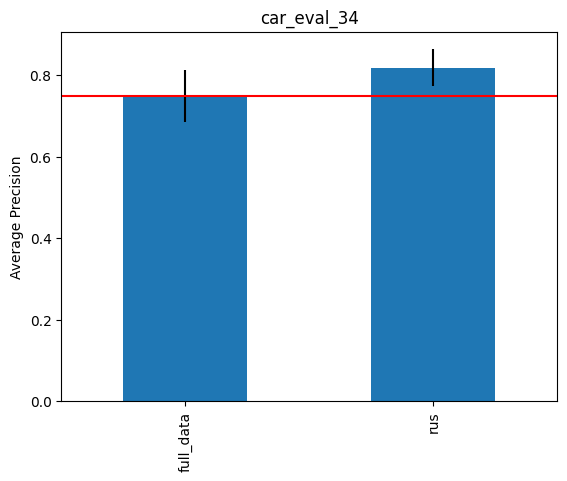

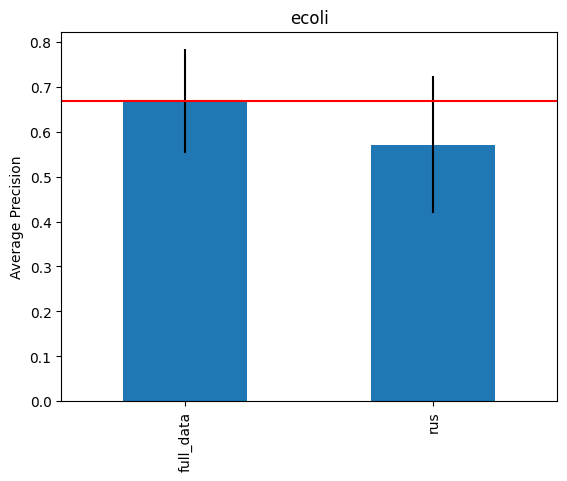

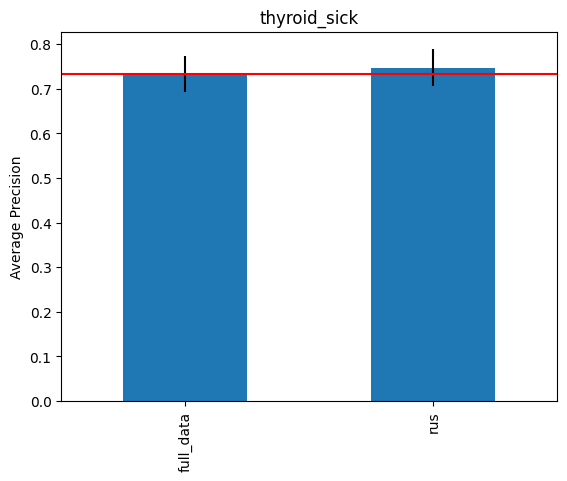

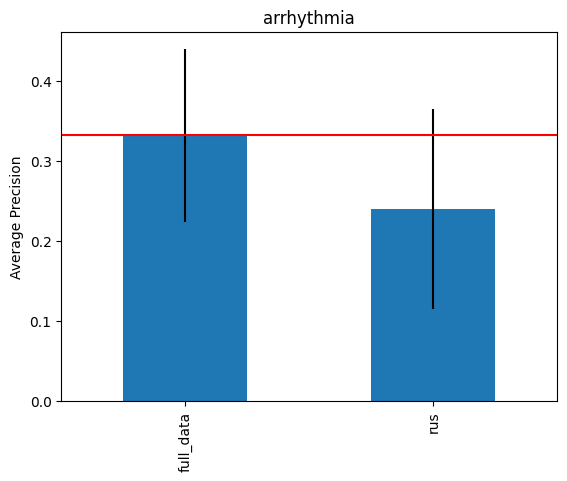

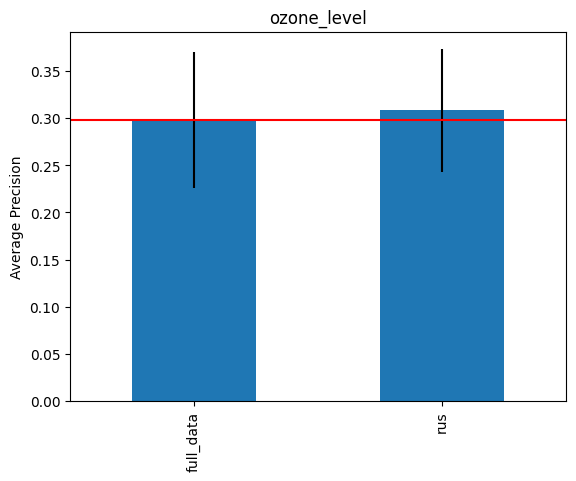

In [24]:
for dataset in datasets_ls:

    pr_mean_s = pd.Series(pr_mean_dict[dataset])
    pr_std_s = pd.Series(pr_std_dict[dataset])

    pr_mean_s.plot.bar(yerr=[pr_std_s, pr_std_s]
        )
    plt.title(dataset)
    plt.ylabel('Average Precision')
    plt.axhline(pr_mean_dict[dataset]['full_data'], color='r')
    plt.show()